# Project - Thera Bank Personal Loan Campaign


### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.
 
### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer \(\$000\)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month \(\$000\)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. \(\$000\)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.


### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classificationmodel
- Model evaluation

#### Domain 
Banking

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)


In [2]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Import data
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [5]:
#Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Get shape of data so that we know how many rows and columns
data.shape

(5000, 14)

In [7]:
#See the first 5 rows of the data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [8]:
#Check if there are any null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready


In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [15]:
#Show the count of unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [41]:
#Number of people with zero mortgage is 3462
data['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [55]:
#Number of people with zero credit card spending per month
data["CCAvg"].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [75]:
#Value counts for categorical columns
personalLoan_count = data['Personal Loan'].value_counts()
securities_count = data['Securities Account'].value_counts()
cdAccount_count = data['CD Account'].value_counts()
online_count = data['Online'].value_counts()
creditCard_count = data['CreditCard'].value_counts()

print('Personal Loan Value Counts:\n', personalLoan_count, '\n')
print('Sercurities Account Value Counts:\n', securities_count, '\n')
print('CD Account Value Counts:\n', cdAccount_count, '\n')
print('Online Value Counts:\n', online_count, '\n')
print('Credit Card Value Counts:\n', creditCard_count, '\n')

Personal Loan Value Counts:
 0    4520
1     480
Name: Personal Loan, dtype: int64 

Sercurities Account Value Counts:
 0    4478
1     522
Name: Securities Account, dtype: int64 

CD Account Value Counts:
 0    4698
1     302
Name: CD Account, dtype: int64 

Online Value Counts:
 1    2984
0    2016
Name: Online, dtype: int64 

Credit Card Value Counts:
 0    3530
1    1470
Name: CreditCard, dtype: int64 



### Univariate Plots

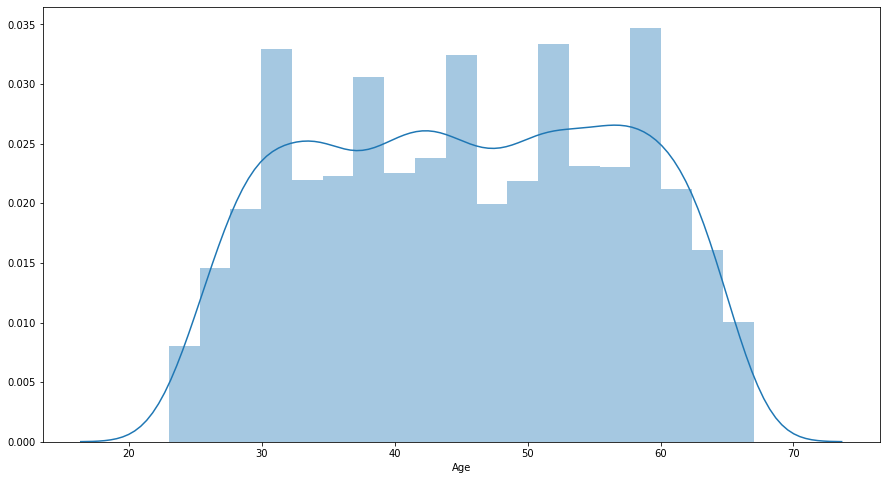

In [118]:
#Looking at what ages are provided in the data
plt.figure(figsize=(15,8))
sns.distplot(data['Age'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

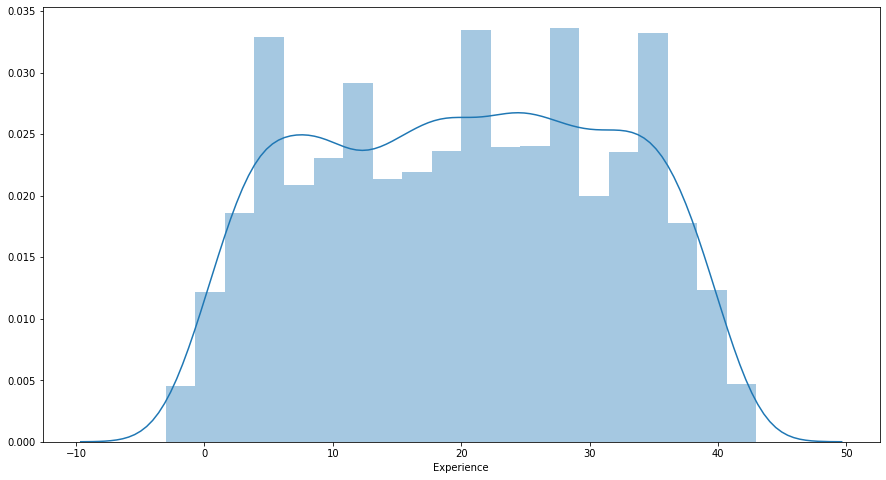

In [117]:
#Spread of years of experience in the data
plt.figure(figsize=(15,8))
sns.distplot(data['Experience'])
plt.show

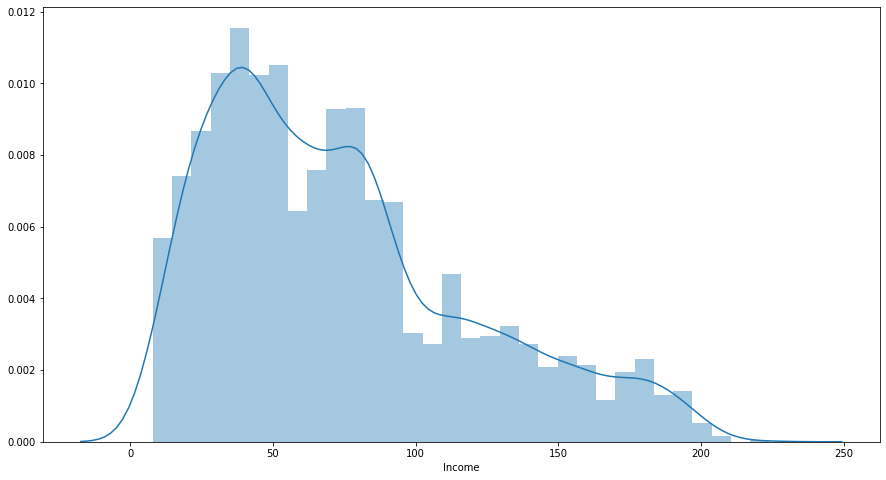

In [116]:
#Checking to see how much our data varies in income levels
plt.figure(figsize=(15,8))
sns.distplot(data['Income'])
plt.show()

**Insights**
`Those applying for loans are between ages 20 and 70`

<AxesSubplot:xlabel='Family', ylabel='count'>

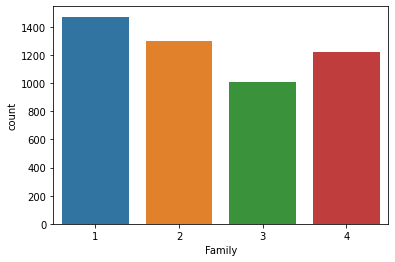

In [105]:
sns.countplot(data['Family'])

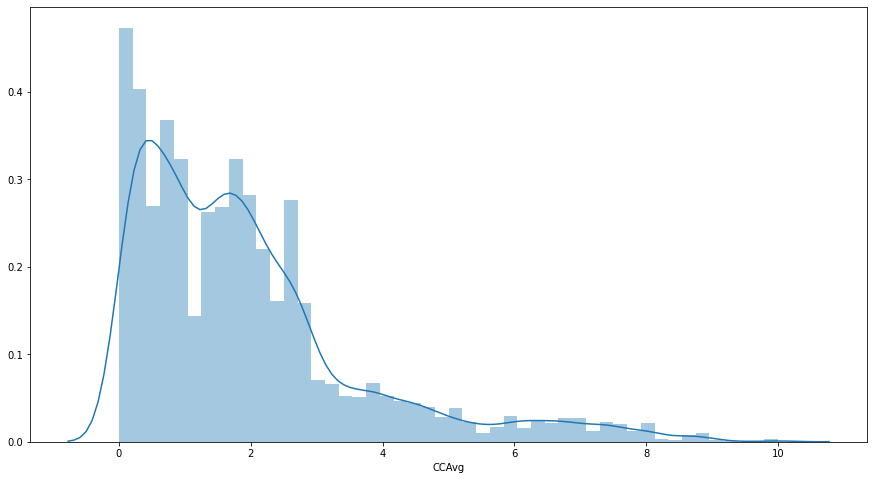

In [115]:
plt.figure(figsize=(15,8))
sns.distplot(data['CCAvg'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

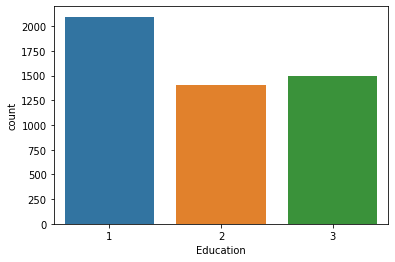

In [119]:
#Seeing the levels of education
# 1: Undergrad; 2: Graduate; 3: Advanced/Professional
sns.countplot(data['Education'])

**Insights**
`Most people have at least undergrad education`

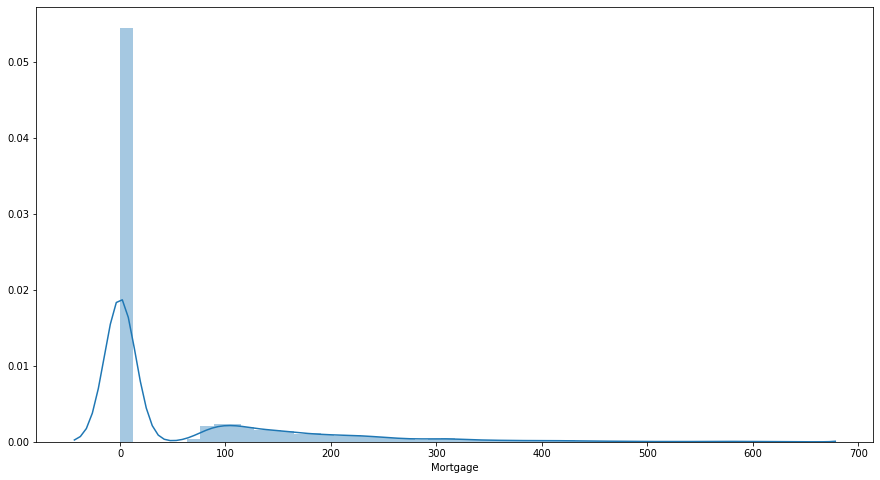

In [128]:
plt.figure(figsize=(15,8))
sns.distplot(data['Mortgage'])
plt.show()

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

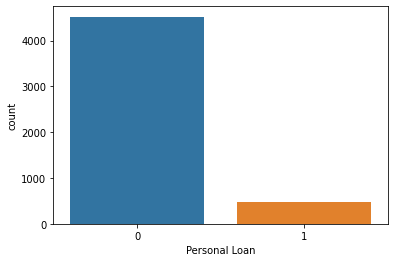

In [131]:
sns.countplot(data['Personal Loan'])

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

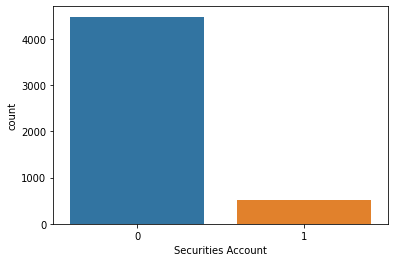

In [132]:
sns.countplot(data['Securities Account'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

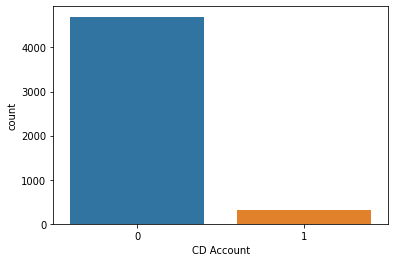

In [134]:
sns.countplot(data['CD Account'])

<AxesSubplot:xlabel='Online', ylabel='count'>

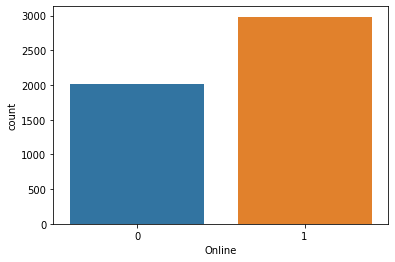

In [137]:
sns.countplot(data['Online'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

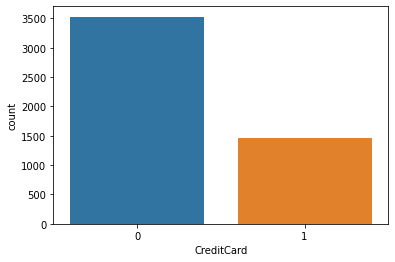

In [139]:
sns.countplot(data['CreditCard'])

### Bivariate Plots

<function matplotlib.pyplot.show(close=None, block=None)>

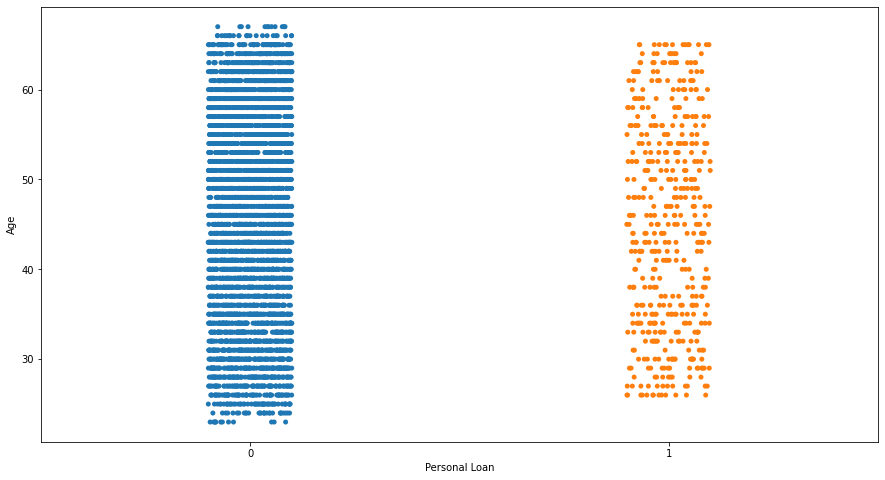

In [148]:
plt.figure(figsize=(15,8))
sns.stripplot(data['Personal Loan'], data['Age'], jitter=True)
plt.show

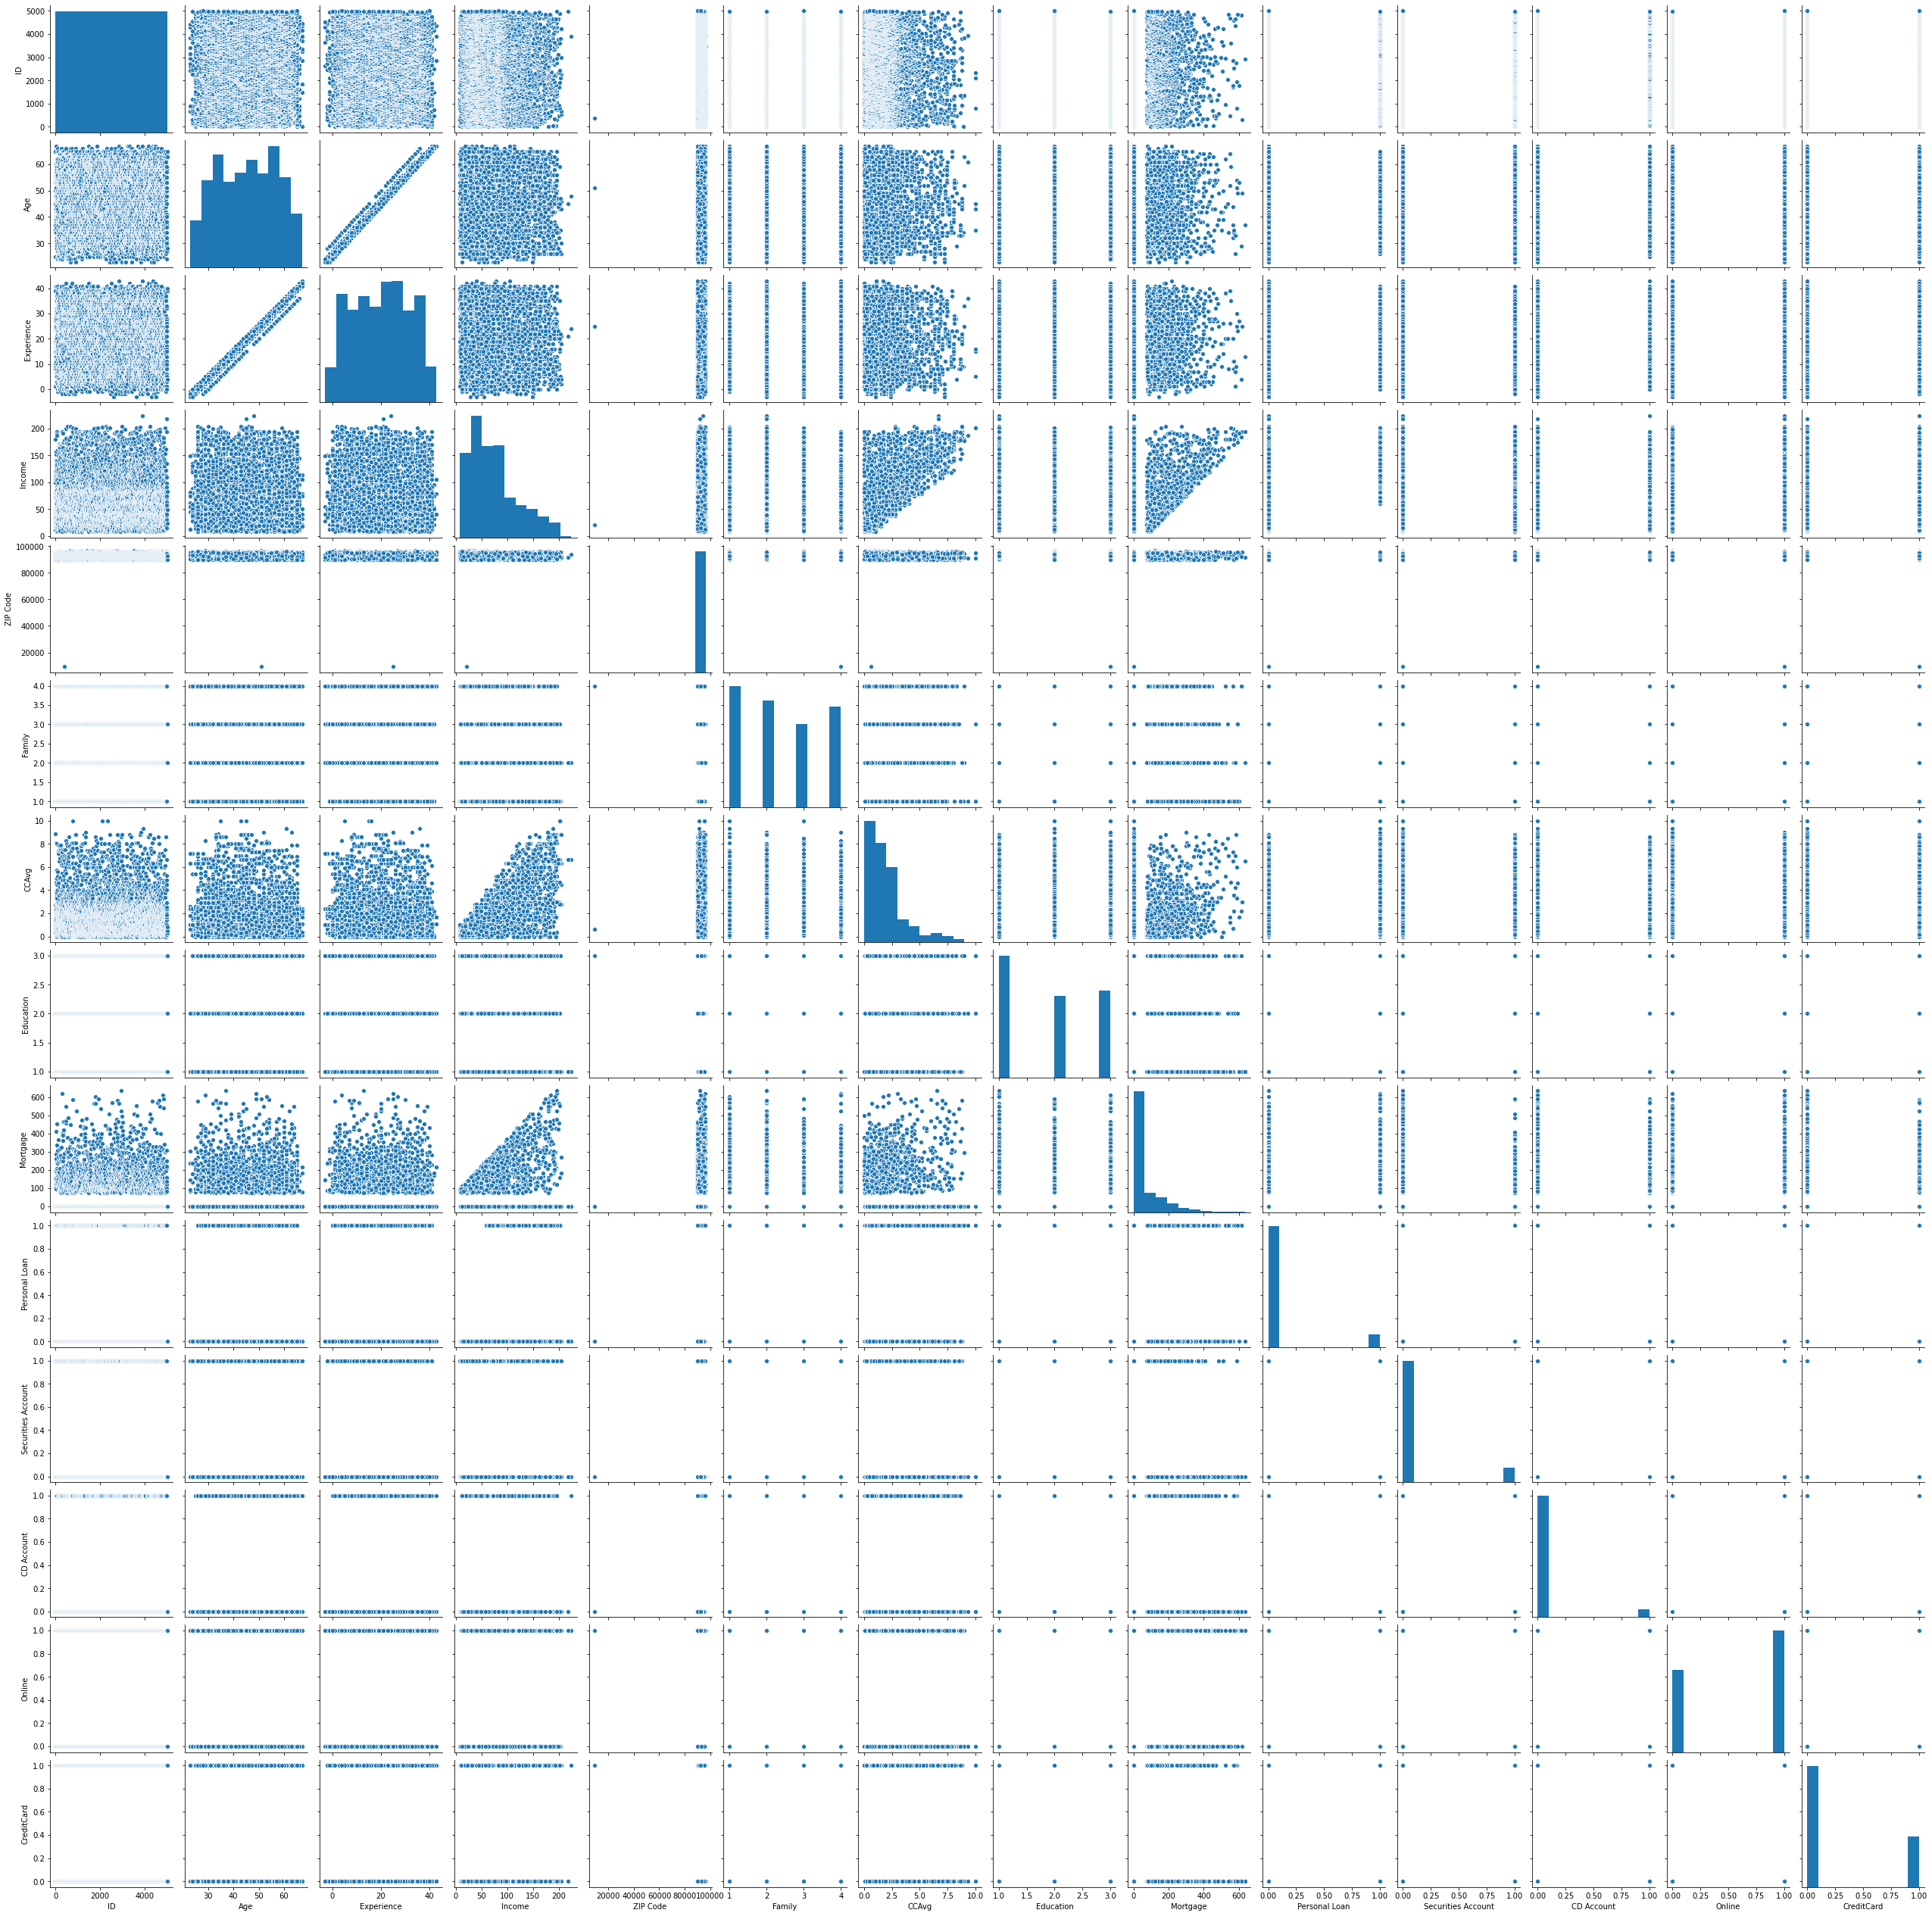

In [150]:
#Getting a visual of all of the data to see how values may be coorelated
sns.pairplot(data);

### Preparing the data

In [13]:
#separating dependent and independent variables
X = data.drop("Personal Loan",axis=1)
Y = data['Personal Loan'].astype('category')

In [14]:
X = pd.get_dummies(X, drop_first=True)

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)


In [18]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

logit = sm.Logit( y_train, sm.add_constant( x_train ))

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.132821
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.585      
Dependent Variable:  Personal Loan    AIC:              957.7460   
Date:                2020-09-18 19:18 BIC:              1043.9933  
No. Observations:    3500             Log-Likelihood:   -464.87    
Df Model:            13               LL-Null:          -1120.1    
Df Residuals:        3486             LLR p-value:      2.9423e-272
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const              -9.4508   4.1161 -2.2961 0.0217 -17.5182 -1.3834
ID                 -0.0001   0.0001 -1.4919 0.1357  -0.0002  0.0000
Age                -0.0602   0.0715 -0.8420 0.3998  -0.2004  0.0800
Experience          0.0721   0.0712  1.0126 0.3112  -0.0675  0.2118
Income              0.0520   0.0030 17.1552 0.0000   0.0461  0.0580
ZIP Code           -0.0000   0.0000 -0.6364 0.5245  -0.0001  0.0001
Family              0.7722   0.0879  8.7896 0.0000   0.6000  0.9444
CCAvg               0.1585   0.0471  3.3680 0.0008   0.0662  0.2507
Education           1.7046   0.1332 12.7952 0.0000   1.4435  1.9657
Mortgage            0.0006   0.0006  0.9870 0.3236  -0.0006  0.0019
Securities Account -0.8263   0.3371 -2.4509 0.0142  -1.4870 -0.1655
CD Account          3.6760   0.3912  9.3963 0.0000   2.9092  4.4428
Online             -0.5901   0.1843 -3.2025 0.0014  -0.9513 -0.2290
CreditCard         -1.1668   0.2385 -4.8916 0.0000  -1.6343 -0.6993
===================================================================

"""

## 4.Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)


In [39]:
#Using a logistic regression model on the training data

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression as lr

lr_model = lr(random_state = 7)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#Making a prediction on the target variable
y_predict = lr_model.predict(x_test)

In [41]:
#Looking at the prediction compared to what was observed for the Personal Loan
z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head(50)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3406,3407,42,12,34,92177,3,2.00,3,0,0,0,0,1,0,0
757,758,52,28,81,91745,3,1.80,2,0,1,0,0,0,0,0
3624,3625,58,28,70,92028,1,1.40,3,0,0,0,0,0,0,0
4544,4545,28,4,80,95819,3,2.50,1,0,0,0,1,0,0,0
3235,3236,60,35,39,91711,2,1.60,3,0,0,0,1,0,0,0
1868,1869,25,1,118,92833,1,5.40,1,0,0,0,1,1,0,0
2916,2917,46,20,40,92037,1,1.20,2,0,0,0,1,0,0,0
3335,3336,35,10,118,92069,2,7.80,1,358,0,0,0,0,0,0
3527,3528,35,10,24,95054,4,1.10,3,0,0,0,0,0,0,0
2827,2828,37,11,84,90266,4,2.20,2,0,0,0,1,1,0,0


**Insights**
`After looking at only 50 rows, the model appears to have more False Negatives`

In [42]:
#This function is used to make the confusion matrix appear as a heatmap
def heatmap_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1], cmap='YlGnBu')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy:  0.9057142857142857 

Testing accuracy:  0.916 

Confusion Matrix:


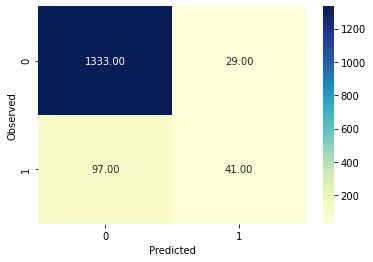

None 

Recall:  0.2971014492753623 

Precision:  0.5857142857142857 

F1 Score:  0.3942307692307692 

Roc Auc Score:  0.6379046159739513 



In [43]:
#Checking all necessary metrics to see how good the model is

print('Training accuracy: ', lr_model.score(x_train,y_train), '\n')  
print('Testing accuracy: ', lr_model.score(x_test, y_test), '\n')
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights**
`There is a higher number of false negatives than false positives.`

## 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)


In [44]:
#Get the Logistic Regression Parameters
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
#Checking to see how the model can be improved first using l1 as a parameter for penalty for liblinear and saga as a solver
train_score=[]
test_score=[]
solver = ['liblinear', 'saga']
for i in solver:
    model = lr(random_state=7,penalty='l1', C = 0.75,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.95, 0.902]

[0.954, 0.908]


In [46]:
#Now checking to see how the model can be improved using l2 as a parameter for penalty for each solver
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = lr(random_state=7,penalty='l2', C = 0.75,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.948, 0.906, 0.906, 0.902, 0.902]

[0.953, 0.916, 0.915, 0.908, 0.908]


**Insights**
`Liblinear with l1 and newton-cg with l2 have the highest accuracy`

In [47]:
#Recreate the logistic regression model with new parameters liblinear and l1
lr_model2 = lr(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced')
lr_model2.fit(x_train, y_train)

#Make the prediction
y_predict = lr_model2.predict(x_test)

#Check the new model's accuracy
print('Training accuracy: ', lr_model2.score(x_train,y_train), '\n')  
print('Testing accuracy: ', lr_model2.score(x_test, y_test))

Training accuracy:  0.8928571428571429 

Testing accuracy:  0.8933333333333333 



**Insights**
`The accuracy lowered from the previous model`

In [49]:
#Creating a new model with newton-cg and l2 as parameters
lr_model3 = lr(random_state=7,penalty='l2',solver='newton-cg',class_weight='balanced')
lr_model3.fit(x_train, y_train)

#Make the prediction
y_predict = lr_model3.predict(x_test)

#Check the new model's accuracy
print('Training accuracy: ', lr_model3.score(x_train,y_train), '\n')  
print('Testing accuracy: ', lr_model3.score(x_test, y_test))

Training accuracy:  0.8948571428571429 

Testing accuracy:  0.8926666666666667 



**Insights**
`There isn't a significant difference in the accuracy of the lr_model3 compared to lr_model2. Both have a lower accuracy than the original model. So I will test accuracy with different values of 'C' to determine if that makes a difference.`

In [ ]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    lr_model4 = lr(random_state=7,penalty='l1', solver='liblinear',class_weight='balanced', C=i)
    lr_model4.fit(x_train, y_train) 
    y_predict = lr_model4.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C, '\n')
print(train_score, '\n')
print(test_score)

**Insights**
`All values of 'C' appear to not make a significant change to the model's accuracy`

Confusion Matrix:


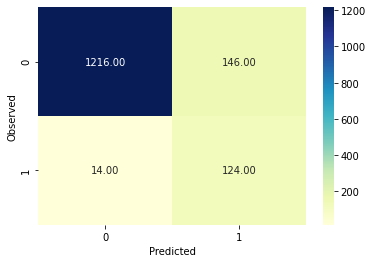

None 

Recall:  0.8985507246376812 

Precision:  0.45925925925925926 

F1 Score:  0.6078431372549019 

Roc Auc Score:  0.8956777118048906


In [53]:
#Checking to see how other preformance metrics were affected
print('Confusion Matrix:')
print(heatmap_matrix(y_test,y_predict), '\n')
print("Recall: ", recall_score(y_test, y_predict), '\n')
print("Precision: ", precision_score(y_test, y_predict), '\n')
print("F1 Score: ", f1_score(y_test, y_predict), '\n')
print("Roc Auc Score: ", roc_auc_score(y_test, y_predict))

**Insights**
`Precision dropped and Recall raised significantly.`

## 6. Give Business understanding of your model (5 marks)

### Definition of Confusion Matrix
##### True Positive ((observed= 1, predicted= 1):
Those who were predicted to buy a personal loan and do buy a personal loan.
##### False Positive ((observed= 0, predicted= 1):
Those who were thought to buy a personal loan but actually didn't.
##### True Negative ((observed= 0, predicted= 0):
Those who would not buy a personal loan and don't buy one.
##### False Negative ((observed= 1, predicted= 0):
Those who would buy a personal loan but we didn't think they would.

### Summary
In this case of determining which of the liability customers would buy a personal loan, we would like more false negatives than nalse posistives. More false negatives means that more people will end up buying a personal loan than we think which would exceed expectations. If we turn out with more false positives then it's possible we won't have much success in converting liability customers.